# wine 데이터셋을 활용하여 K-means를 수행하시오.
##### (["alcohol", "total_phenols"] feature 사용)

# 1. Elbow point를 시각화하시오.

# 2. silhouette diagram을 시각화하시오.

# 3. 해당 결과를 토대로 optimal k를 제시하시오.


In [1]:
import numpy as np
import os
from sklearn.datasets import load_wine
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = load_wine(as_frame=True)

In [3]:
df = dataset.frame
df["class"] = dataset.target
data = df[["alcohol","total_phenols"]]

In [4]:
data

,alcohol,total_phenols
0,14.23,2.80
1,13.20,2.65
2,13.16,2.80
3,14.37,3.85
4,13.24,2.80
...,...,...
173,13.71,1.68
174,13.40,1.80
175,13.27,1.59
176,13.17,1.65


In [5]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target', 'class'],
      dtype='object')

In [6]:
df[["class"]]

,class
0,0
1,0
2,0
3,0
4,0
...,...
173,2
174,2
175,2
176,2


<AxesSubplot:xlabel='alcohol', ylabel='total_phenols'>

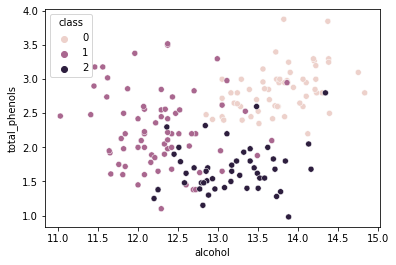

In [7]:
sns.scatterplot(data=df, x='alcohol', y='total_phenols', hue='class')

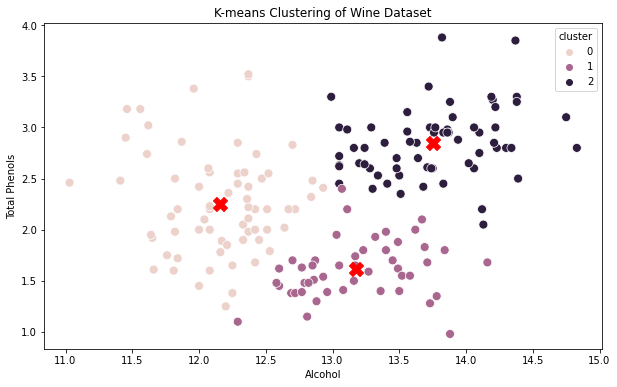

In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
y_pred = kmeans.fit_predict(data)

df['cluster'] = y_pred


plt.figure(figsize=(10, 6))
sns.scatterplot(x="alcohol", y="total_phenols", hue="cluster", data=df, s=80)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, c='red')
plt.xlabel('Alcohol')
plt.ylabel('Total Phenols')
plt.title('K-means Clustering of Wine Dataset')
plt.show()

In [58]:
kmeans1 = KMeans(n_clusters=1, random_state=42)
y_pred1 = kmeans1.fit_predict(data)
kmeans2 = KMeans(n_clusters=2, random_state=42)
y_pred2 = kmeans2.fit_predict(data)
kmeans3 = KMeans(n_clusters=3, random_state=42)
y_pred3 = kmeans3.fit_predict(data)
kmeans4 = KMeans(n_clusters=4, random_state=42)
y_pred4 = kmeans4.fit_predict(data)
kmeans5 = KMeans(n_clusters=5, random_state=42)
y_pred5 = kmeans5.fit_predict(data)

C:\Users\grupi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [59]:
df['cluster2'] = y_pred2
df['cluster3'] = y_pred3
df['cluster4'] = y_pred4
df['cluster5'] = y_pred5

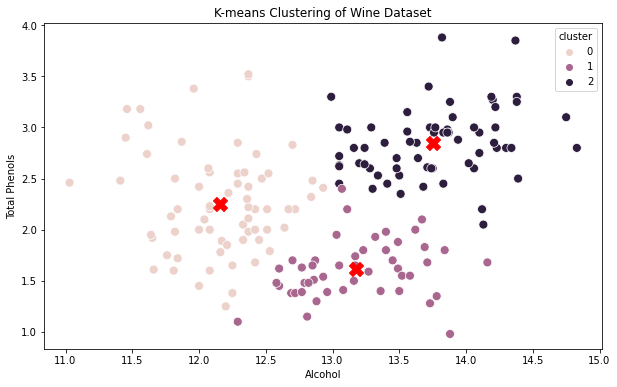

In [10]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
y_pred1 = kmeans.fit_predict(data)

df['cluster'] = y_pred1


plt.figure(figsize=(10, 6))
sns.scatterplot(x="alcohol", y="total_phenols", hue="cluster", data=df, s=80)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, c='red')
plt.xlabel('Alcohol')
plt.ylabel('Total Phenols')
plt.title('K-means Clustering of Wine Dataset')
plt.show()

In [11]:
# 1. Elbow point를 시각화하시오.
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(data)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

C:\Users\grupi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [12]:
X_dist = kmeans.transform(data)
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

58.398312169537604

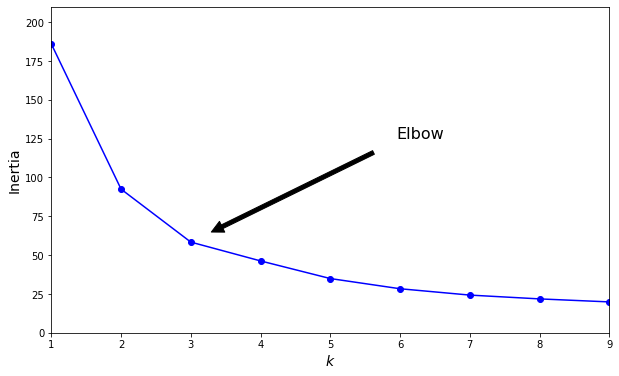

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(3, inertias[2]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 9, 0, 210])
plt.show()

In [93]:
# 2. silhouette diagram을 시각화하시오.

In [14]:
from sklearn.metrics import silhouette_score
silhouette_score(data, kmeans.labels_)

0.43919614923122996

In [76]:
silhouette_scores = [silhouette_score(data, model.labels_)
                     for model in kmeans_per_k[1:]]

In [74]:
silhouette_scores

[0.4377889947239076,
 0.43919614923122996,
 0.39849307862345235,
 0.38463616530407163,
 0.39329548409389065,
 0.3921943676831875,
 0.36149348199223263,
 0.3499386239496598]

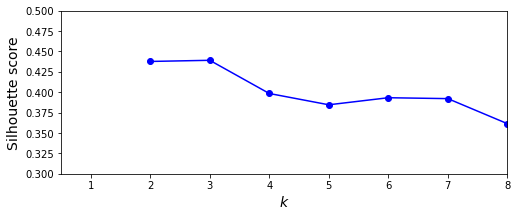

In [80]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([0.5, 8, 0.3, 0.5])
plt.show()

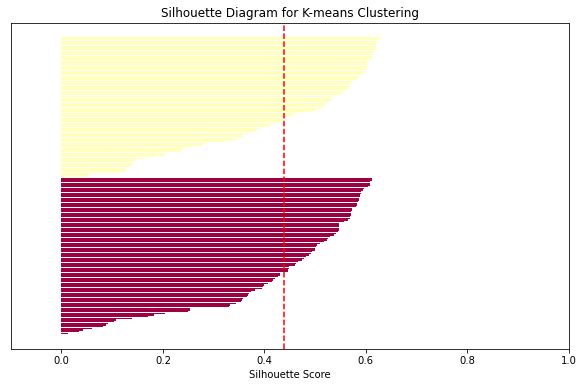

In [86]:

df['cluster2'] = y_pred2
silhouette_vals = silhouette_samples(data, y_pred2)


fig, ax = plt.subplots(figsize=(10, 6))

y_lower, y_upper = 0, 0
for cluster_label in np.unique(y_pred2):
    cluster_silhouette_vals = silhouette_vals[y_pred2 == cluster_label]
    cluster_silhouette_vals.sort()

    y_upper += len(cluster_silhouette_vals)
    color = plt.cm.Spectral(cluster_label / len(np.unique(y_pred2)))  
    ax.barh(range(y_lower, y_upper), cluster_silhouette_vals, color=color)
    y_ticks = [(y_lower + y_upper) / 2]
    y_lower += len(cluster_silhouette_vals)


silhouette_avg = np.mean(silhouette_vals)

ax.axvline(silhouette_avg, color="red", linestyle="--")

ax.set_yticks([]) 
ax.set_xlim([-0.1, 1])
ax.set_xlabel('Silhouette Score')
ax.set_title('Silhouette Diagram for K-means Clustering')

plt.show()


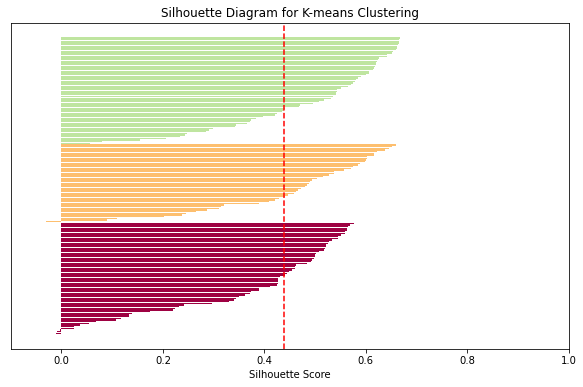

In [87]:

silhouette_vals = silhouette_samples(data, y_pred3)

fig, ax = plt.subplots(figsize=(10, 6))

y_lower, y_upper = 0, 0
for cluster_label in np.unique(y_pred3):
    cluster_silhouette_vals = silhouette_vals[y_pred3 == cluster_label]
    cluster_silhouette_vals.sort()

    y_upper += len(cluster_silhouette_vals)
    color = plt.cm.Spectral(cluster_label / len(np.unique(y_pred3))) 
    ax.barh(range(y_lower, y_upper), cluster_silhouette_vals, color=color)
    y_ticks = [(y_lower + y_upper) / 2]
    y_lower += len(cluster_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)

ax.axvline(silhouette_avg, color="red", linestyle="--")

ax.set_yticks([]) 
ax.set_xlim([-0.1, 1])
ax.set_xlabel('Silhouette Score')
ax.set_title('Silhouette Diagram for K-means Clustering')

plt.show()


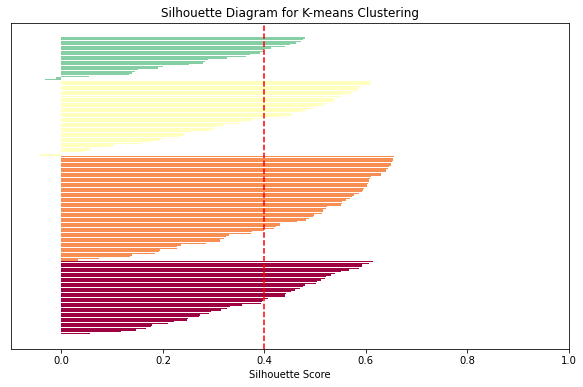

In [88]:

silhouette_vals = silhouette_samples(data, y_pred4)

fig, ax = plt.subplots(figsize=(10, 6))

y_lower, y_upper = 0, 0
for cluster_label in np.unique(y_pred4):
    cluster_silhouette_vals = silhouette_vals[y_pred4 == cluster_label]
    cluster_silhouette_vals.sort()

    y_upper += len(cluster_silhouette_vals)
    color = plt.cm.Spectral(cluster_label / len(np.unique(y_pred4))) 
    ax.barh(range(y_lower, y_upper), cluster_silhouette_vals, color=color)
    y_ticks = [(y_lower + y_upper) / 2]
    y_lower += len(cluster_silhouette_vals)


silhouette_avg = np.mean(silhouette_vals)


ax.axvline(silhouette_avg, color="red", linestyle="--")

ax.set_yticks([]) 
ax.set_xlim([-0.1, 1])
ax.set_xlabel('Silhouette Score')
ax.set_title('Silhouette Diagram for K-means Clustering')

plt.show()


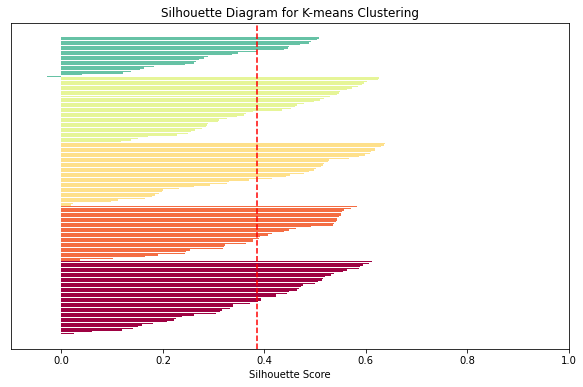

In [89]:
silhouette_vals = silhouette_samples(data, y_pred5)

fig, ax = plt.subplots(figsize=(10, 6))

y_lower, y_upper = 0, 0
for cluster_label in np.unique(y_pred5):
    cluster_silhouette_vals = silhouette_vals[y_pred5 == cluster_label]
    cluster_silhouette_vals.sort()

    y_upper += len(cluster_silhouette_vals)
    color = plt.cm.Spectral(cluster_label / len(np.unique(y_pred5)))
    ax.barh(range(y_lower, y_upper), cluster_silhouette_vals, color=color)
    y_ticks = [(y_lower + y_upper) / 2]
    y_lower += len(cluster_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)

ax.axvline(silhouette_avg, color="red", linestyle="--")


ax.set_yticks([]) 
ax.set_xlim([-0.1, 1])
ax.set_xlabel('Silhouette Score')
ax.set_title('Silhouette Diagram for K-means Clustering')

plt.show()


In [90]:
def plot_silhouette(ax, y_pred, data):
    silhouette_vals = silhouette_samples(data, y_pred)

    y_lower, y_upper = 0, 0
    for cluster_label in np.unique(y_pred):
        cluster_silhouette_vals = silhouette_vals[y_pred == cluster_label]
        cluster_silhouette_vals.sort()

        y_upper += len(cluster_silhouette_vals)
        color = plt.cm.Spectral(cluster_label / len(np.unique(y_pred)))
        ax.barh(range(y_lower, y_upper), cluster_silhouette_vals, color=color)
        y_ticks = [(y_lower + y_upper) / 2]
        y_lower += len(cluster_silhouette_vals)

    silhouette_avg = np.mean(silhouette_vals)
    ax.axvline(silhouette_avg, color="red", linestyle="--")

    ax.set_yticks([])
    ax.set_xlim([-0.1, 1])
    ax.set_xlabel('Silhouette Score')
    ax.set_title('Silhouette Diagram for K-means Clustering')


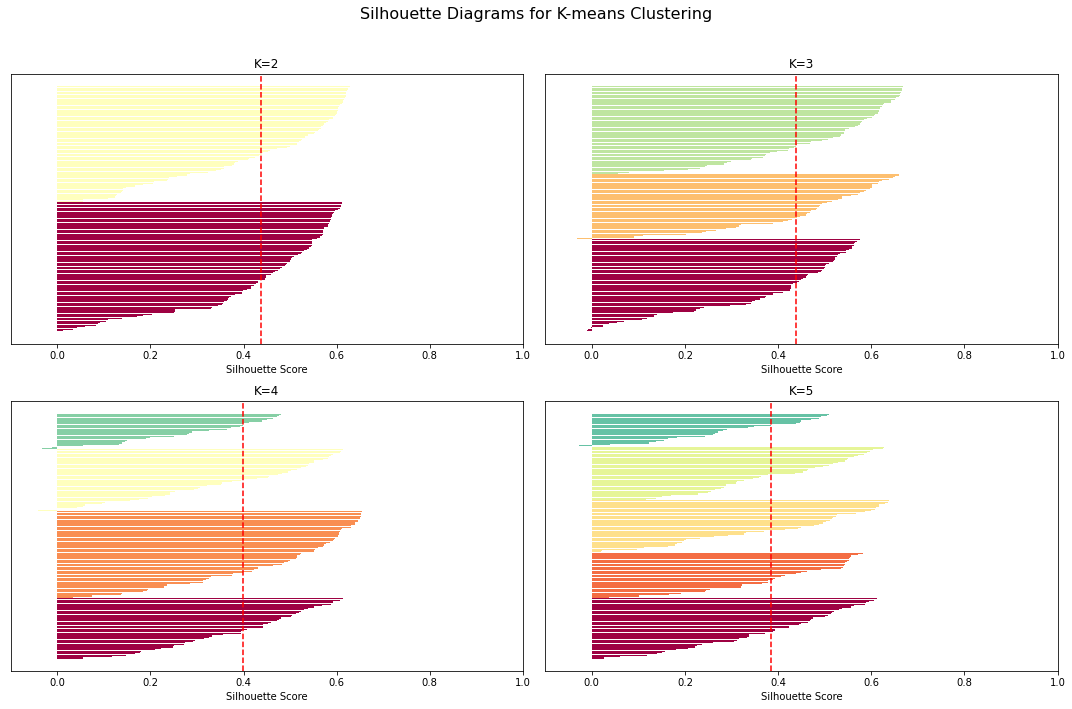

In [91]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
plot_silhouette(ax1, y_pred2, data)
ax1.set_title('K=2')

plot_silhouette(ax2, y_pred3, data)
ax2.set_title('K=3')

plot_silhouette(ax3, y_pred4, data)
ax3.set_title('K=4')

plot_silhouette(ax4, y_pred5, data)
ax4.set_title('K=5')

plt.suptitle('Silhouette Diagrams for K-means Clustering', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()


In [20]:
# 3. 해당 결과를 토대로 optimal k를 제시하시오.

### 3. optimal K = 3
Elbow Method에서는 Inertia가 클러스터 수가 증가함에 따라 급격하게 감소하다가 어느 시점에서 감소가 완만해지는 지점을 찾습니다. 이 지점이 Elbow(팔꿈치)로 표현되며, 이때의 클러스터 수가 적절한 K로 간주됩니다. 그래프를 그려보았을때 Elbow는 3으로 판단됩니다.
또한 실루엣계수가  k가 3일때 0.4391로 가장 높은 수치를 보여줍니다.